In [1]:
import tensorflow as tf
import cv2
import os

import matplotlib.pyplot as plt
import numpy as np
import pickle
from tensorflow import keras
from tensorflow.keras import layers                     

In [2]:
folder='train'
classes=['Open_Eyes','Closed_Eyes']
train_data=[]
for i in classes:
    path=os.path.join(folder,i)
    class_num=classes.index(i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        rgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        new_array=cv2.resize(rgb,(224,224))
        train_data.append([new_array,class_num])

In [3]:
import random 
random.shuffle(train_data)


In [4]:
x=[]
y=[]
for i,j in train_data:
    x.append(i)
    y.append(j)
x=np.array(x).reshape(-1,224,224,3)


In [5]:
print( x.shape)

(4000, 224, 224, 3)


In [6]:
x=x/255.0

In [7]:
y=np.array(y)

In [8]:
import pickle
pickle_out=open('x.pickle','wb')
pickle.dump(x,pickle_out)
pickle_out.close

pickle_out=open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close


<function BufferedWriter.close>

In [9]:
pickle_in=open('x.pickle','rb')
x=pickle.load(pickle_in)

pickle_in=open('y.pickle','rb')
y=pickle.load(pickle_in)


In [10]:
model=tf.keras.applications.mobilenet.MobileNet()

In [11]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_3_bn (BatchNormaliz  (None, 56, 56, 128)      512       
 ation)                                                          
                                                                 
 conv_pw_3_relu (ReLU)       (None, 56, 56, 128)       0         
                                                                 
 conv_pad_4 (ZeroPadding2D)  (None, 57, 57, 128)       0         
                                                                 
 conv_dw_4 (DepthwiseConv2D)  (None, 28, 28, 128)      1152      
                                                                 
 conv_dw_4_bn (BatchNormaliz  (None, 28, 28, 128)      512       
 ation)                                                          
                                                                 
 conv_dw_4_relu (ReLU)       (None, 28, 28, 128)       0         
                                                                 
 conv_pw_4

In [12]:
base_input=model.layers[0].input

In [13]:
base_output=model.layers[-4].output

In [14]:
flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(flat_layer)
final_op=layers.Activation('sigmoid')(final_output)

In [15]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [16]:
new_model.compile(loss= 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
new_model.fit(x,y,epochs=5, validation_split= 0.1)

Epoch 1/5
113/113 [==============================] - 472s 4s/step - loss: 0.7506 - accuracy: 0.9444 - val_loss: 2.0067 - val_accuracy: 0.8225
Epoch 2/5
113/113 [==============================] - 507s 4s/step - loss: 0.2631 - accuracy: 0.9822 - val_loss: 0.3092 - val_accuracy: 0.9800
Epoch 3/5
113/113 [==============================] - 369s 3s/step - loss: 0.1488 - accuracy: 0.9903 - val_loss: 0.0771 - val_accuracy: 0.9950
Epoch 4/5
113/113 [==============================] - 379s 3s/step - loss: 0.0562 - accuracy: 0.9958 - val_loss: 0.0386 - val_accuracy: 0.9975
Epoch 5/5
113/113 [==============================] - 395s 3s/step - loss: 0.0343 - accuracy: 0.9978 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [20]:
new_model.save('my_model.h5')

In [21]:
new_model=tf.keras.models.load_model('my_model.h5')

In [22]:
img=cv2.imread('open-test_2.png',cv2.IMREAD_GRAYSCALE)
rgb=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new=cv2.resize(rgb,(224,224))

In [23]:
x_input=np.array(new).reshape(1,224,224,3)

In [24]:
x_input.shape

(1, 224, 224, 3)

In [25]:
x_input=x_input/255.0

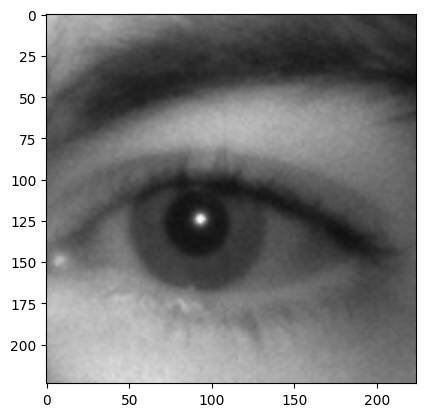

In [26]:
plt.imshow(new)

In [27]:
prediction=new_model.predict(x_input)

1/1 [==============================] - 0s 384ms/step


In [28]:
prediction

array([[-34.95456]], dtype=float32)

In [29]:
img=cv2.imread('thbeauty1615531998.jpg')

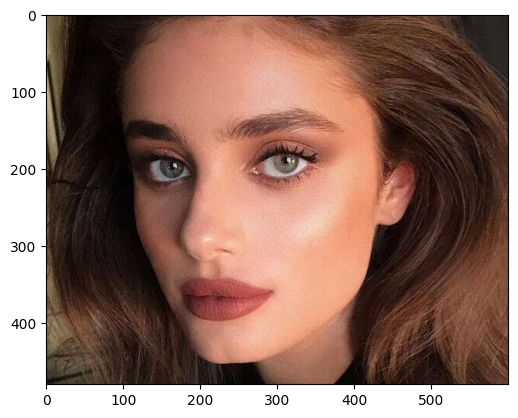

In [30]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [31]:
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascades_frontalface_default.xml')

In [32]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [33]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [34]:
eyes=eye_cascade.detectMultiScale(gray,1.1,4)

In [35]:
for x,y,w,h in eyes[:2]:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

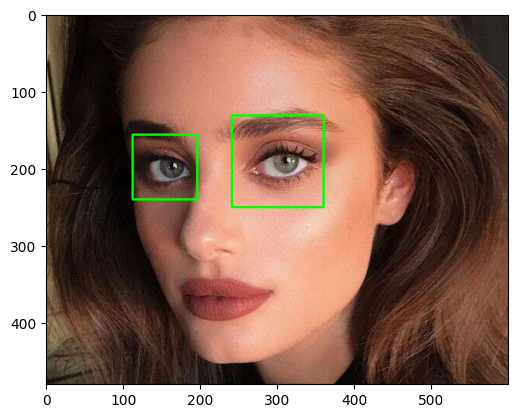

In [36]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [37]:
gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
eyes=eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes[:2]:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=img[y:y+h,x:x+w]
    eyess=eye_cascade.detectMultiScale(roi_gray)
    if len(eyess)==0:
        print('eyes are not detected')
    else:
        for(ex,ey,ew,eh) in eyess:
            eyes_roi=roi_color[ey:ey+eh,ex:ex+ew]

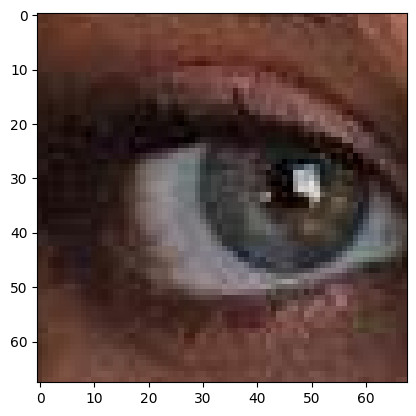

In [38]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [39]:
final_image=cv2.resize(eyes_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [40]:
final_image.shape

(1, 224, 224, 3)

In [41]:
predictions=new_model.predict(final_image)

1/1 [==============================] - 0s 47ms/step


In [42]:
predictions

array([[-21.511717]], dtype=float32)

In [43]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError('cannot open webcam')

while True:
    cbs = 0
        # read the camera frame
    success, frame = cap.read()
    if not success:
        break
    else:
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
        faces = face_cascade.detectMultiScale(frame, 1.1, 7)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Draw rectangle around each face
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 3)
            if len(eyes) == 0:
                print('Eyes not detected')
                cbs = 0
                break

            for (ex, ey, ew, eh) in eyes:
                cbs = 1
                cv2.rectangle(roi_color, (ex, ey),
                                  (ex+ew, ey+eh), (0, 255, 0), 2)
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

    if cbs == 1:
        final_image = cv2.resize(eyes_roi, (224, 224))
        final_image = np.expand_dims(final_image, axis=0)
        final_image = final_image/255.0

        predictions = new_model.predict(final_image)
        if (predictions[0][0] < 0.3):
            status = "Open Eyes"
        else:
            status = "Closed Eyes"

        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, status, (50, 50), font,
                        3, (0, 0, 255), 2, cv2.LINE_4)
    
    cv2.imshow('Driver Drowsiness detection',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

Eyes not detected
1/1 [==============================] - 0s 43ms/step
Eyes not detected
1/1 [==============================] - 0s 40ms/step
